# Part II - Effects of Reason delay on Their Departure delay
## Thi My Hao PHAM



## Investigation Overview


In this investigation, I wanted to look at the reason delay, time, region, manufacture that could be used to predict their departure delay. The main focus was on the LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn


## Dataset Overview

This document explores a dataset containing flights and attributes for approximately 7,500,000 flights and other table are airports (3,300 rows), plane-data (5,000 rows). The attributes included flights minutes, scheduled flight minutes, delay minutes, reason delay minutes, origin city, origin state, manufacture and time.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_flights = pd.read_csv('2007.csv.bz2')

#Change data type
# Change type of column timestamp
df_flights.DepTime = pd.to_datetime(df_flights.DepTime, unit='s').dt.time
df_flights.CRSDepTime = pd.to_datetime(df_flights.CRSDepTime, unit='s').dt.time
df_flights.ArrTime = pd.to_datetime(df_flights.ArrTime, unit='s').dt.time
df_flights.CRSArrTime = pd.to_datetime(df_flights.CRSArrTime, unit='s').dt.time
df_flights.FlightNum = df_flights.FlightNum.astype('str')

#create actual time
df_flights['OccurrenceTime'] = df_flights.Year.astype('str') +'-'+  df_flights.Month.astype('str') +'-'+  df_flights.DayofMonth.astype('str')
df_flights.OccurrenceTime = pd.to_datetime(df_flights.OccurrenceTime)
#df_flights = df_flights.drop(columns= ["Year", "Month","DayofMonth"])

In [3]:
### Enrich Manufacturer from plane-data
# load in the dataset into a pandas dataframe, print statistics
df_planes = pd.read_csv('plane-data.csv')
df_planes = df_planes[df_planes.tailnum.notnull()]
dicts = {"tailnum":"TailNum", 
        "manufacturer":"Manufacturer", 
        "issue_date":"IssueDate"}
 
# call rename () method
df_planes = df_planes.rename(columns=dicts)
df_planes = df_planes[[ "TailNum","Manufacturer"]]
#df_planes.IssueDate = pd.to_datetime(df_planes.IssueDate)

df_flights = pd.merge(df_flights, df_planes, how='left', on='TailNum')

In [4]:
# load in the dataset into a pandas dataframe, print statistics
df_airports_origin = pd.read_csv('airports.csv')
df_airports_origin = df_airports_origin[df_airports_origin.iata.notnull()]
dicts = {"iata":"Origin", 
        "city":"CityOrigin",
        "state":"StateOrigin"}
 
# call rename () method
df_airports_origin = df_airports_origin.rename(columns=dicts)
df_airports_origin = df_airports_origin[[ "Origin","CityOrigin","StateOrigin"]]

#Enrich City Origin to data
df_flights = pd.merge(df_flights, df_airports_origin, how='left', on='Origin')

In [5]:
#Function groupby
def Groupbycol(df, col):
    df.LateAircraftDelay.value_counts()

    df_flights_cityor = df.groupby([col]).sum()

    df_flights_cityor.index.values
    df_flights_cityor[col] =  df_flights_cityor.index.values
    return df_flights_cityor


df_flights_month = Groupbycol(df_flights, "Month")
df_flights_nanufac = Groupbycol(df_flights, "Manufacturer")
df_flights_nanufac.sort_values("DepDelay", axis = 0, ascending = True, inplace = True)
df_flights_cityor = Groupbycol(df_flights, "CityOrigin")
df_flights_cityor.sort_values("DepDelay", axis = 0, ascending = True, inplace = True)
df_flights_stateor = Groupbycol(df_flights, "StateOrigin")
df_flights_stateor.sort_values("DepDelay", axis = 0, ascending = False, inplace = True)

##  Distribution of Departure Delay using the transformation

Observations: The Flights Minutes variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between  250 𝑎𝑛𝑑 300 


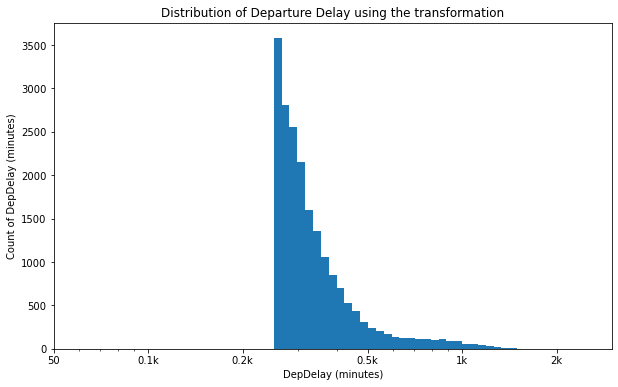

In [6]:
# there's a long tail in the distribution, so let's put it on a log scale instead
df_flights_de = df_flights[df_flights.DepDelay > 15]
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_flights_de['DepDelay'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_flights_de, x = 'DepDelay', bins = bins)
plt.xscale('log')
plt.xticks([50, 1e2, 2e2, 5e2, 1e3, 2e3], [50, '0.1k', '0.2k', '0.5k', '1k', '2k'])
plt.title('Distribution of Departure Delay using the transformation')
plt.ylabel('Count of DepDelay (minutes)')
plt.xlabel('DepDelay (minutes)')
plt.show()

## Distribution flights par month in 2007

Observations:

Number of flights are hight in begining of year and in the end of year

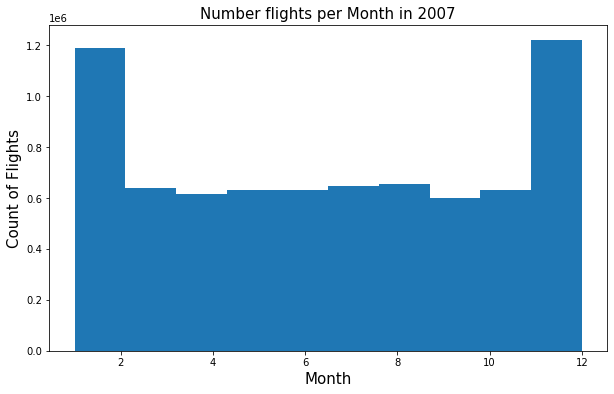

In [7]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.subplots(figsize=(10, 6))
plt.title("Number flights per Month in 2007", size=15);
#plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel("Count of Flights", size=15);
plt.xlabel("Month", size=15);
plt.hist(data = df_flights, x = 'Month');

## Correlation of feature
Observations:

LateAircraftDelay, ArrDelay, DepDelay have hight positive correletion
AirTime, Distance have negative correlation

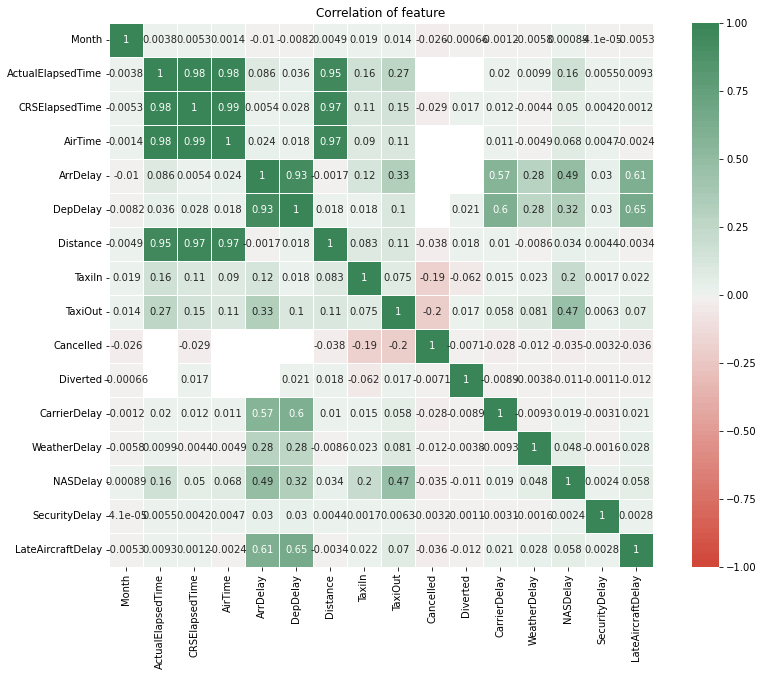

In [16]:
df_flights_map = df_flights.drop(columns= ["Year","DayofMonth", "DayOfWeek"])
# Draw the correlation matrix
fig, axes = plt.subplots(figsize=(14, 10))
plt.title('Correlation of feature')
corr = df_flights_map.corr()
axes = sb.heatmap(corr, annot=True, center=0, linewidths=1, square=True, cmap=sb.diverging_palette(15, 500, n = 100), vmin=-1, vmax=1)



## Arrival Delay Minutes par month in 2007

Observations:

Departure Delay minutes and Arrival Delay minutes have the most late in Juin

Departure Delay minutes and Arrival Delay minutes have the least late in September

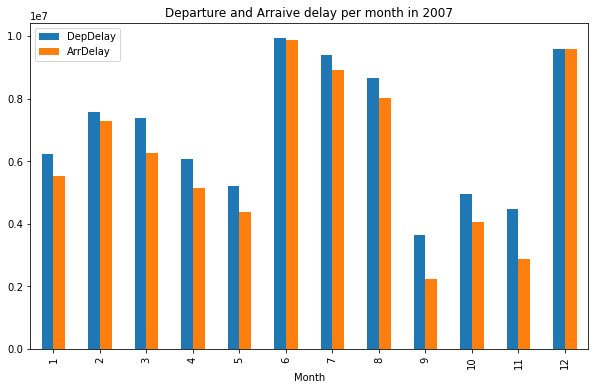

In [9]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_month.plot(x="Month", y=["DepDelay", "ArrDelay"], kind="bar",figsize=(10,6),  title='Departure and Arraive delay per month in 2007')
plt.show()

## Reason Delay Minutes par month in 2007
Observations:

In for reason delay: LateAircraftDelay, NASDelay, WeatherDelay, CarrierDelay

+ DepDelay have link with reason delay
+ LateAircraftDelay is the most common cause
+ WeatherDelay is the least common cause
+ NASDelay and CarrierDelay are nearly equal reason

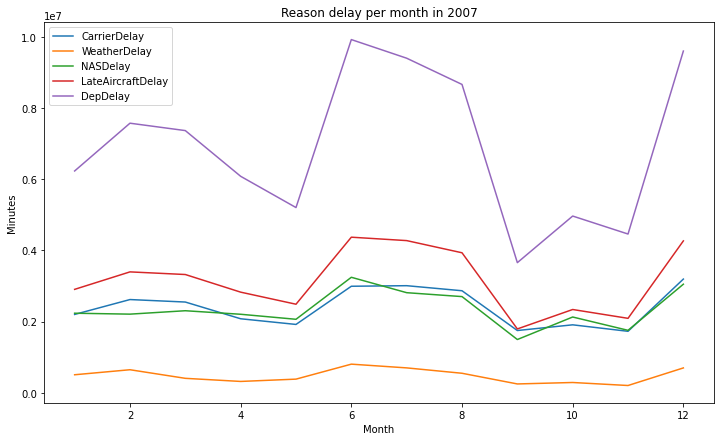

In [10]:
#Create line chart for reason delay minutes
df_reason_month = df_flights_month[["CarrierDelay","WeatherDelay","NASDelay","LateAircraftDelay","DepDelay"]]
ax=df_reason_month.plot.line( title='Reason delay per month in 2007',markersize=25, figsize=(12, 7))
ax.set_ylabel("Minutes");

## Flight Delay Minutes par manufacture in 2007
Observations:

In all manufacture have total flights minutes in 2007:
+ Boeing have the most total flight departure delay minutes
+ 2nd place has total flight departure delay minutes is Airbus, Embraer, Bombardier

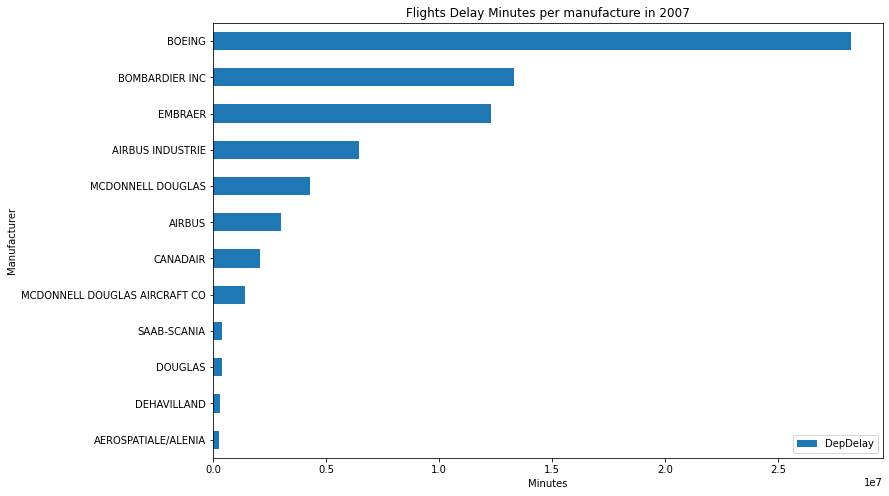

In [11]:
#Create chart Flights Minutes per manufacture in 2007
df_flights_nanufac.tail(12).plot(x="Manufacturer", y="DepDelay", kind="barh",figsize=(12,8),  title='Flights Delay Minutes per manufacture in 2007')
plt.xlabel("Minutes")
plt.show()

## Arrival Departure Delay Minutes per manufacture in 2007
Observations:

In all manufacture have departure delay and arrival delay in 2007:
+ Boeing have the most total departure delay and arrival delay minutes
+ Airbus and Airbus Industie are of Airbus, so 2nd place has total departure delay and arrival delay minutes is Airbus, Embraer and Bombardier


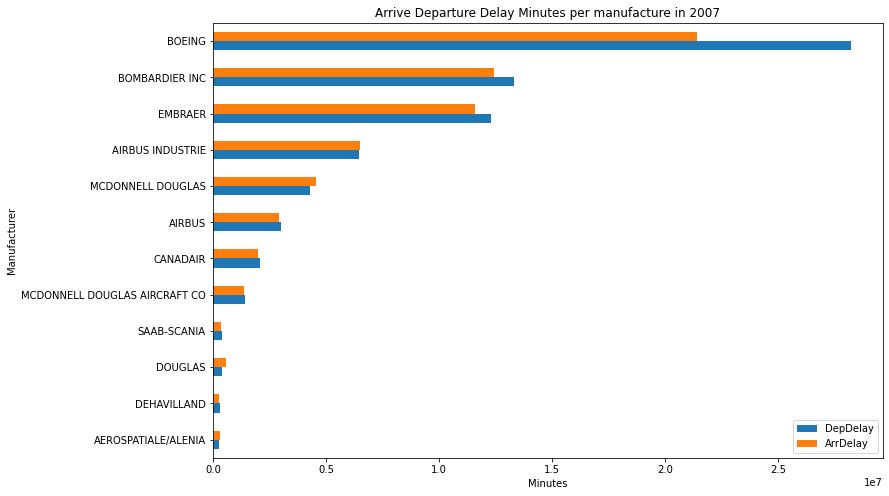

In [12]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_nanufac.tail(12).plot(x="Manufacturer", y=["DepDelay", "ArrDelay"], kind="barh",figsize=(12,8),  title='Arrive Departure Delay Minutes per manufacture in 2007')
plt.xlabel("Minutes")
plt.show()

##  Distribution DepDelay and ArrDelay per City Origin

Observations:

In all City Origin have ArrDelay  and DepDelay in 2007:
+ Chicago have the most total flights delay minutes in 2007, then Atlanta

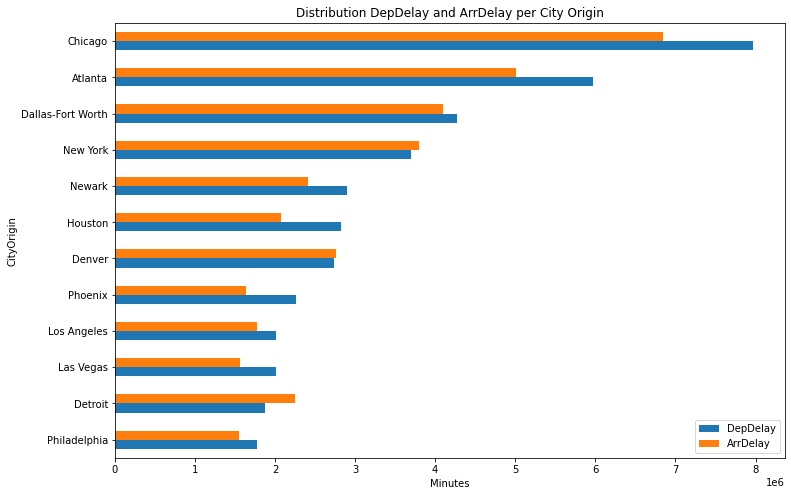

In [13]:
#Cteare chart Arrival Delay Minutes per month in 2007
df_flights_cityor.tail(12).plot(x="CityOrigin", y=["DepDelay", "ArrDelay"], kind="barh",figsize=(12,8),  title='Distribution DepDelay and ArrDelay per City Origin')
plt.xlabel("Minutes")
plt.show()


## Distribution Reasion deday (CarrierDelay, WeatherDelay,  NASDelay , SecurityDelay, LateAircraftDelay) and DepDelay per State Origin
Observations:

In all rgion have CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay in 2007:
+ SecurityDelay is the least common cause
+ LateAircraftDelay is the most common cause
+ Althought CA have the mót flight in 2007, but TX is the most WeatherDelay,NASDelay and LateAircraftDelay

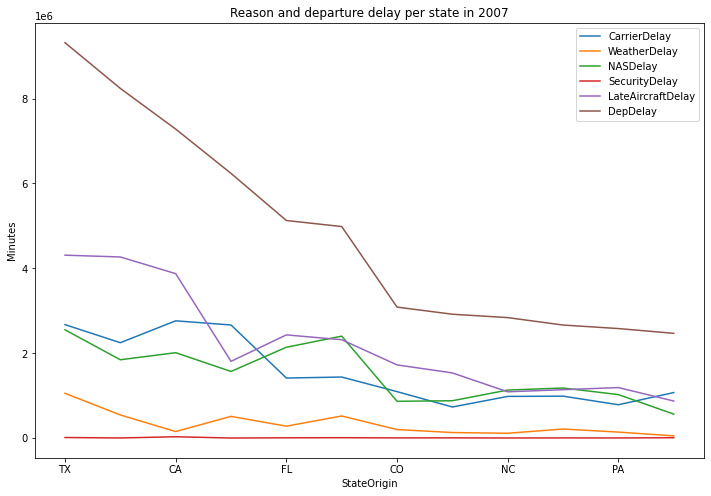

In [14]:
#Create line chart for reason delay minutes
df_reason_stateor = df_flights_stateor[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","DepDelay"]]
ax=df_reason_stateor.head(12).plot.line( title='Reason and departure delay per state in 2007',markersize=25, figsize=(12, 8))
ax.set_ylabel("Minutes");

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Flights Minutes variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked unimodal, with one peak between  250 𝑎𝑛𝑑 300 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The initial plot of the 'Year', 'Month', 'DayofMonth' features show good points. There are not any unusual distributions

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Departure delay had a surprisingly high amount of correlation with the reason delay (LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

LateAircraftDelay, WeatherDelay, NASDelay, CarrierDelay, TaxiIn dont have correction clearly beetwen each orther. A small negative correlation was observed between Cancelled, Diverted, Distance, ArrTime, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also 2 cols StateDest and Manufacturer have link with delay minutes

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this point, LateAircraftDelay have the closest correlection with departure delay

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the reason delay

## Conclusions

+ LateAircraftDelay is the main reason of departure delay minutes.
+ Boeing have the most total departure delay minutes
+ TX state have the most total departure delay minutes
+ Chicago city have the most total departure delay minutes
